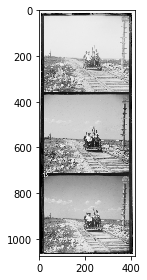

In [19]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float
import numpy as np

img = imread('https://stepik.org/media/attachments/lesson/58182/00.png')
height = img.shape[0]  
width = img.shape[1] 

grin_width = 237
grin_height = 508

imshow(img)



In [20]:
img_f = img_as_float(img)

In [21]:
pictures_1 = img_f[0:int(height/3)]
pictures_2 = img_f[int(height/3):int(height/3)*2]
pictures_3 = img_f[int(height/3)*2:int(height/3)*3]


pictures_1 = pictures_1[int(pictures_1.shape[0]*0.1):int(pictures_1.shape[0]*0.9),
                        int(pictures_1.shape[1]*0.1):int(pictures_1.shape[1]*0.9)]
pictures_2 = pictures_2[int(pictures_2.shape[0]*0.1):int(pictures_2.shape[0]*0.9),
                        int(pictures_2.shape[1]*0.1):int(pictures_2.shape[1]*0.9)]
pictures_3 = pictures_3[int(pictures_3.shape[0]*0.1):int(pictures_3.shape[0]*0.9),
                        int(pictures_3.shape[1]*0.1):int(pictures_3.shape[1]*0.9)]


In [22]:
blue_row_shift = -15
correlation_old = 0
for number in range(30):
    correlation = (np.roll(pictures_1,number-15,axis=0) * pictures_2).sum()#width
    if(correlation >= correlation_old):
        correlation_old = correlation
        blue_row_shift = (number - 15)
print(blue_row_shift)


blue_col_shift = -15
correlation_old = 0
for number in range(30):
    correlation = (np.roll(pictures_1,number-15,axis=1) * pictures_2).sum()#height
    if(correlation >= correlation_old):
        correlation_old = correlation
        blue_col_shift = (number - 15)
        
print(blue_col_shift)

-3
0


In [23]:
red_row_shift = -15
correlation_old = 0
for number in range(30):
    correlation = (np.roll(pictures_3,number-15,axis=0) * pictures_2).sum()#width
    if(correlation >= correlation_old):
        correlation_old = correlation
        red_row_shift = (number - 15)
print(red_row_shift)


red_col_shift = -15
correlation_old = 0
for number in range(30):
    correlation = (np.roll(pictures_3,number-15,axis=1) * pictures_2).sum()#height
    if(correlation >= correlation_old):
        correlation_old = correlation
        red_col_shift = (number - 15)
        
print(red_col_shift)

9
-1


In [24]:
indent_height = (grin_height - int(height/3)) - int(int(height/3) * 0.1)
indent_width = grin_width - int(width * 0.1)

In [25]:
row_b =  int(width * 0.1) + indent_width + blue_row_shift
col_b = int(int(height/3) * 0.1) + indent_height + blue_col_shift
print(row_b)
print(col_b)

234
150


In [26]:
row_r =  int(width * 0.1) + indent_width + red_row_shift
col_r = int(height/3*2) + int(int(height/3) * 0.1) + indent_height + blue_col_shift
print(row_r)
print(col_r)

246
866


In [27]:
from numpy import dstack
pictures_1 = np.roll(pictures_1,blue_row_shift,axis=0)
pictures_1 = np.roll(pictures_1,blue_col_shift,axis=1)

pictures_3 = np.roll(pictures_3,red_row_shift,axis=0)
pictures_3 = np.roll(pictures_3,red_col_shift,axis=1)


photo = dstack((pictures_3,pictures_2,pictures_1))
imsave('out_img.png',photo)